In [3]:
#from astropy.io import fits
#import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
#from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as colors
import time


# Read Processed Data

In [4]:
data = pd.read_csv('/home/savannahgramze/blue_ast7939/class_data/data.csv')
data = data.drop(data.columns[0], axis=1)
data

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,Inclination,Outer Radius,Aperture Size
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987,0.043152,189.252694,162.377674
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988,13.982281,189.252694,162.377674
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989,26.056123,189.252694,162.377674
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985,30.872557,189.252694,162.377674
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986,49.120022,189.252694,162.377674
...,...,...,...,...,...,...,...,...
1819995,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757,40.487483,323.089104,263.665090
1819996,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445,53.199500,323.089104,263.665090
1819997,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257,66.392727,323.089104,263.665090
1819998,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111,72.333480,323.089104,263.665090


In [5]:
pd.set_option('use_inf_as_na', True)

In [6]:
data['log10 SphM'] = np.log10(data['Sphere Masses'])
data['log10 LOSM'] = np.log10(data['Line-of-Sight Masses'])
data['log10 1mm'] = np.log10(data['1mm Flux'])
data['log10 3mm'] = np.log10(data['3mm Flux'])

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
data

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,Inclination,Outer Radius,Aperture Size,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987,0.043152,189.252694,162.377674,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988,13.982281,189.252694,162.377674,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989,26.056123,189.252694,162.377674,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985,30.872557,189.252694,162.377674,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986,49.120022,189.252694,162.377674,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...,...,...,...
1819995,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757,40.487483,323.089104,263.665090,-6.664728,-6.780692,3.423898,2.144869
1819996,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445,53.199500,323.089104,263.665090,-6.664728,-6.780692,3.424127,2.145167
1819997,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257,66.392727,323.089104,263.665090,-6.664728,-6.780692,3.425281,2.146616
1819998,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111,72.333480,323.089104,263.665090,-6.664728,-6.780692,3.425266,2.146578


In [8]:
df = data.dropna().reset_index(drop=True)
df

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,Inclination,Outer Radius,Aperture Size,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987,0.043152,189.252694,162.377674,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988,13.982281,189.252694,162.377674,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989,26.056123,189.252694,162.377674,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985,30.872557,189.252694,162.377674,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986,49.120022,189.252694,162.377674,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...,...,...,...
1596326,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757,40.487483,323.089104,263.665090,-6.664728,-6.780692,3.423898,2.144869
1596327,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445,53.199500,323.089104,263.665090,-6.664728,-6.780692,3.424127,2.145167
1596328,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257,66.392727,323.089104,263.665090,-6.664728,-6.780692,3.425281,2.146616
1596329,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111,72.333480,323.089104,263.665090,-6.664728,-6.780692,3.425266,2.146578


In [9]:
for col in df.columns:
    try: 
        print(col, np.sum(np.isnan(df[col])))
    except: 
        print(col)

Geometry
Sphere Masses 0
Line-of-Sight Masses 0
1mm Flux 0
3mm Flux 0
Inclination 0
Outer Radius 0
Aperture Size 0
log10 SphM 0
log10 LOSM 0
log10 1mm 0
log10 3mm 0


In [10]:
for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    print(geo, df_geo.shape, np.std(df_geo['Inclination']))

spu-smi (79376, 12) 25.96071328231648
s-u-smi (73333, 12) 26.000271072057423
s-pbhmi (74680, 12) 26.015178044830105
s-p-smi (8137, 12) 0.0
s-pbsmi (74430, 12) 25.99506473361045
spubhmi (644103, 12) 25.9899922571038
s-ubhmi (74681, 12) 26.028292408098906
s-p-hmi (8394, 12) 0.0
spubsmi (330460, 12) 25.99158718182606
s-ubsmi (75893, 12) 25.994789885180676
spu-hmi (79108, 12) 25.973373725529886
s-u-hmi (73736, 12) 25.944069080872463


In [11]:
pd.concat([df.loc[df['Geometry'] == 's-p-smi'], df.loc[df['Geometry'] == 's-p-hmi']])

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,Inclination,Outer Radius,Aperture Size,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
227389,s-p-smi,264.438916,3.636084e+02,2.603451e+05,13421.279297,45.0,3.031050e+05,233572.146909,2.422325,2.560634,5.415549,4.127794
227390,s-p-smi,0.006574,8.199085e-03,3.576817e+03,187.640594,45.0,9.206701e+03,7847.599704,-2.182155,-2.086235,3.553497,2.273327
227391,s-p-smi,0.000091,1.460224e-04,3.991027e-03,0.000214,45.0,2.437789e+03,1832.980711,-4.043056,-3.835581,-2.398915,-3.669884
227392,s-p-smi,0.011595,2.202695e-02,3.478672e+05,17813.662109,45.0,1.209735e+04,7847.599704,-1.935725,-1.657046,5.541413,4.250753
227393,s-p-smi,0.000029,3.562977e-05,1.052643e+02,5.580523,45.0,1.367650e+03,1128.837892,-4.540711,-4.448187,2.022281,0.746675
...,...,...,...,...,...,...,...,...,...,...,...,...
1037129,s-p-hmi,0.000001,2.410508e-06,9.719936e-01,0.051528,45.0,5.976713e+02,428.133240,-5.853721,-5.617891,-0.012337,-1.287956
1037130,s-p-hmi,648619.231204,5.841541e+08,1.560859e+07,950880.687500,45.0,3.803702e+07,1000000.000000,5.811990,8.766527,7.193364,5.978126
1037131,s-p-hmi,0.045653,5.258826e-02,2.347632e+01,1.229563,45.0,1.471259e+04,12742.749857,-1.340527,-1.279111,1.370630,0.089751
1037132,s-p-hmi,0.000007,1.076640e-05,1.859817e+03,96.436729,45.0,9.392637e+02,695.192796,-5.152820,-4.967929,3.269470,1.984242


# Divide into Training, Testing, Validation 

In [12]:
X = np.array([df['log10 1mm'], df['log10 3mm'], df['Inclination']]).T
X.shape

(1596331, 3)

In [13]:
y = np.array(df['log10 SphM'])
#y = np.array(df['log10 LOSM'])
y.shape

(1596331,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## First split off 30% of the data for validation+testing
#X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.3, shuffle=True)
#
## Then divide this subset into training and testing sets
#X_valid, X_test, y_valid, y_test = train_test_split(X_split, y_split, test_size=0.666, shuffle=True)

In [15]:
normalizer = keras.layers.Normalization(axis=-1)

In [16]:
normalizer.adapt(np.array(X_train))

2023-05-03 00:48:44.789700: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 00:48:45.340435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


# Build and Compile the NN

In [17]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,
                              layers.Dense(50, activation='relu'),
                              layers.Dense(50, activation='relu'),
                              layers.Dense(1)])
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=0.5)
                 )
    return model

In [18]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,808
Trainable params: 2,801
Non-trainable params: 7
_________________________________________________________________


# Train the NN

In [19]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.tf", save_best_only=True)

In [21]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    #verbose=0, 
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping_cb],
    shuffle=True,
    verbose=True,
    #validation_data=(X_valid, y_valid),
    use_multiprocessing=True)

Epoch 1/100
  111/29932 [..............................] - ETA: 41s - loss: 11.0407  

2023-05-03 00:49:07.947577: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


29932/29932 [==============================] - ETA: 0s - loss: 4.8128

2023-05-03 00:49:54.685306: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model.tf/assets
29932/29932 [==============================] - 48s 2ms/step - loss: 4.8128 - val_loss: 2.6693
Epoch 2/100
29932/29932 [==============================] - 47s 2ms/step - loss: 2.2678 - val_loss: 2.0759
Epoch 3/100
29932/29932 [==============================] - 49s 2ms/step - loss: 1.9686 - val_loss: 1.8608
Epoch 4/100
29932/29932 [==============================] - 47s 2ms/step - loss: 1.8374 - val_loss: 1.7948
Epoch 5/100
29932/29932 [==============================] - 49s 2ms/step - loss: 1.7645 - val_loss: 1.7366
Epoch 6/100
29932/29932 [==============================] - 47s 2ms/step - loss: 1.7355 - val_loss: 1.7650
Epoch 7/100
29932/29932 [==============================] - 47s 2ms/step - loss: 1.7279 - val_loss: 1.8594
Epoch 8/100
29932/29932 [==============================] - 49s 2ms/step - loss: 1.7196 - val_loss: 1.6807
Epoch 9/100
29932/29932 [==============================] - 46s 2ms/step - loss: 1.7190 - val_loss: 1.7229
Ep

In [22]:
dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_inclin_6.tf", save_format='tf')
#dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_los_1.tf", save_format='tf')

INFO:tensorflow:Assets written to: /home/savannahgramze/blue_ast7939/class_data/models/nn_model_inclin_6.tf/assets


In [23]:
#dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_9.h5", save_format='h5')

# Evaluate the NN

In [26]:
dnn_model_o = keras.models.load_model("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_inclin_5.tf")

In [27]:
#dnn_model_h = keras.models.load_model("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_9.h5")

In [24]:
y_prediction = dnn_model.predict(X_test)
y_known = dnn_model.predict(X_train)
y_prediction

array([[-2.6327612 ],
       [ 4.9293427 ],
       [-2.5652907 ],
       ...,
       [ 0.9807533 ],
       [ 0.15886155],
       [ 2.1338089 ]], dtype=float32)

In [25]:
linear = np.geomspace(0.01, 2.5*10**7, num=10)

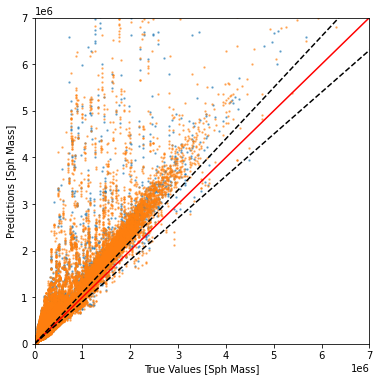

In [37]:
plt.figure(figsize=(6,6))
#plt.axes(aspect='equal')
plt.scatter(10**y_test, 10**y_prediction, 2, alpha=0.5, label='testing data')
plt.scatter(10**y_train, 10**y_known, 2, alpha=0.5, label='training data')
#plt.scatter()
plt.xlabel('True Values [Sph Mass]')
plt.ylabel('Predictions [Sph Mass]')
plt.plot(linear, linear, color='red')
outlier_plus = linear + 0.1*(1+linear)
outlier_minus = linear - 0.1*(1+linear)
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
#lims = [0, 1.75e7]
plt.xlim(left=0, right=np.max(10**y_test))
plt.ylim(bottom=0, top=np.max(10**y_prediction))
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(left=0, right=7e6) #right=np.max(10**y_test))
plt.ylim(bottom=0, top=7e6)
#_ = plt.plot(lims, lims)
plt.savefig('./plots/mass_sph_compare.png')

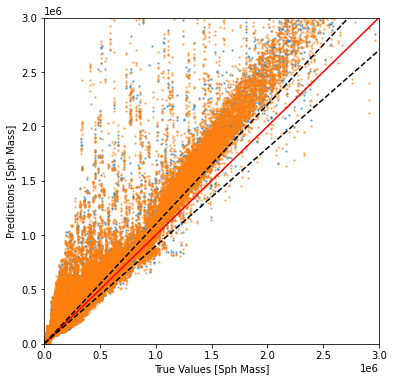

In [27]:
plt.figure(figsize=(6,6))
#plt.axes(aspect='equal')
plt.scatter(10**y_test, 10**y_prediction, 2, alpha=0.5)
plt.scatter(10**y_train, 10**y_known, 2, alpha=0.5)
#plt.scatter()
plt.xlabel('True Values [Sph Mass]')
plt.ylabel('Predictions [Sph Mass]')
plt.plot(linear, linear, color='red')
outlier_plus = linear + 0.1*(1+linear)
outlier_minus = linear - 0.1*(1+linear)
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
#lims = [0, 1.75e7]
plt.xlim(left=0, right=3e6) #right=np.max(10**y_test))
plt.ylim(bottom=0, top=3e6) #top=np.max(10**y_prediction))
#plt.xscale('log')
#plt.yscale('log')
#_ = plt.plot(lims, lims)
plt.savefig('./plots/mass_sph_compare_zoom.png')

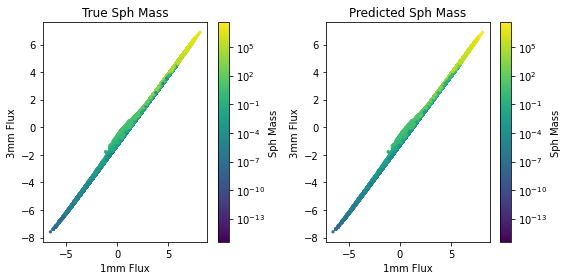

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axs = axes.flatten()

vmin = np.min(10**y_prediction)
vmax = np.max(10**y_prediction)

norm = colors.LogNorm(vmin=vmin, vmax=vmax)

zl_plot_1 = axs[0].scatter(X_test.T[0], X_test.T[1], 5, c=10**y_test, norm=norm)
axs[0].set_title('True Sph Mass')
axs[0].set_xlabel('1mm Flux')
axs[0].set_ylabel('3mm Flux')
cbar = plt.colorbar(zl_plot_1, ax=axs[0])
cbar.set_label('Sph Mass')

zl_plot_2 = axs[1].scatter(X_test.T[0], X_test.T[1], 5, c=10**y_prediction, norm=norm)
axs[1].set_title('Predicted Sph Mass')
axs[1].set_xlabel('1mm Flux')
axs[1].set_ylabel('3mm Flux')
cbar = plt.colorbar(zl_plot_2, ax=axs[1])
cbar.set_label('Sph Mass')

fig.tight_layout()
plt.savefig('./plots/allgeos_fluxpredmass.png')

In [29]:
# loss, 
accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)

In [30]:
accuracy

1.7515263557434082

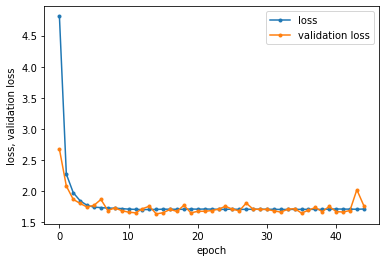

In [31]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()
plt.savefig('./plots/lossval.png')

# Testing per Geometry

In [32]:
df['Geometry'].unique()

array(['spu-smi', 's-u-smi', 's-pbhmi', 's-p-smi', 's-pbsmi', 'spubhmi',
       's-ubhmi', 's-p-hmi', 'spubsmi', 's-ubsmi', 'spu-hmi', 's-u-hmi'],
      dtype=object)

In [33]:
df.loc[df['Geometry'] == 'spu-smi']

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,Inclination,Outer Radius,Aperture Size,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,0.008387,0.008387,0.046890,0.002987,0.043152,189.252694,162.377674,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,0.008387,0.008387,0.046897,0.002988,13.982281,189.252694,162.377674,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,0.008387,0.008387,0.046906,0.002989,26.056123,189.252694,162.377674,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,0.008387,0.008387,0.046842,0.002985,30.872557,189.252694,162.377674,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,0.008387,0.008387,0.046829,0.002986,49.120022,189.252694,162.377674,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...,...,...,...
79371,spu-smi,1.587513,1.587601,23866.808594,1254.251099,45.209029,3015.060519,1832.980711,0.200717,0.200741,4.377794,3.098384
79372,spu-smi,1.587513,1.587601,23077.843750,1207.075439,55.322339,3015.060519,1832.980711,0.200717,0.200741,4.363195,3.081734
79373,spu-smi,1.587513,1.587601,22893.148438,1202.093628,69.662731,3015.060519,1832.980711,0.200717,0.200741,4.359706,3.079938
79374,spu-smi,1.587513,1.587601,22990.677734,1211.865479,77.354968,3015.060519,1832.980711,0.200717,0.200741,4.361552,3.083454


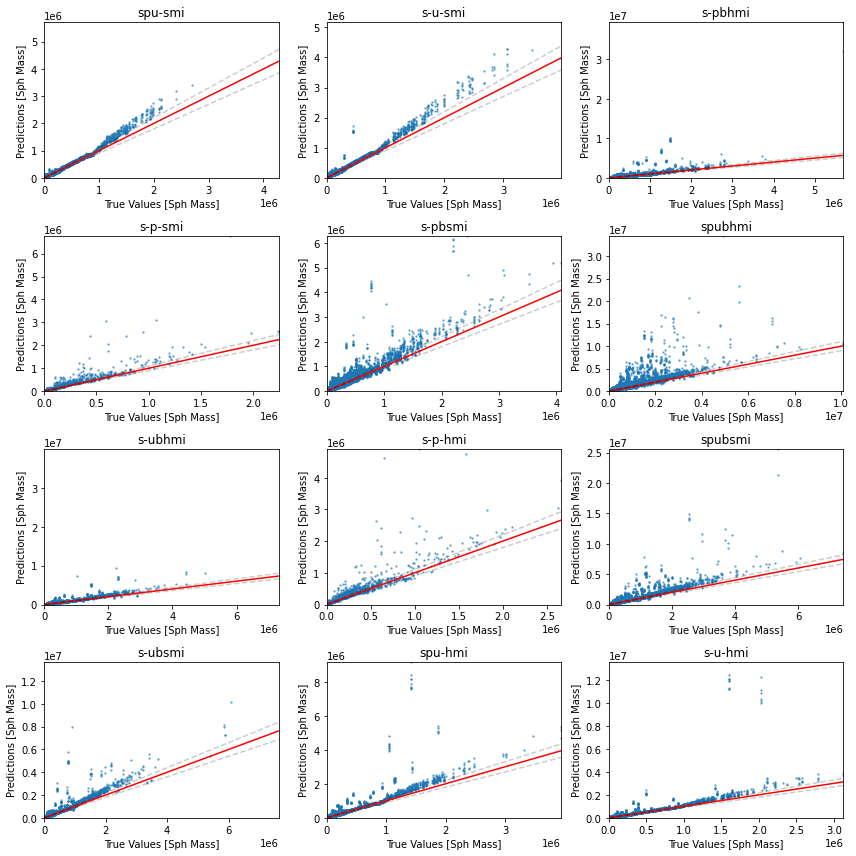

In [34]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo))
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred))
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare.png')

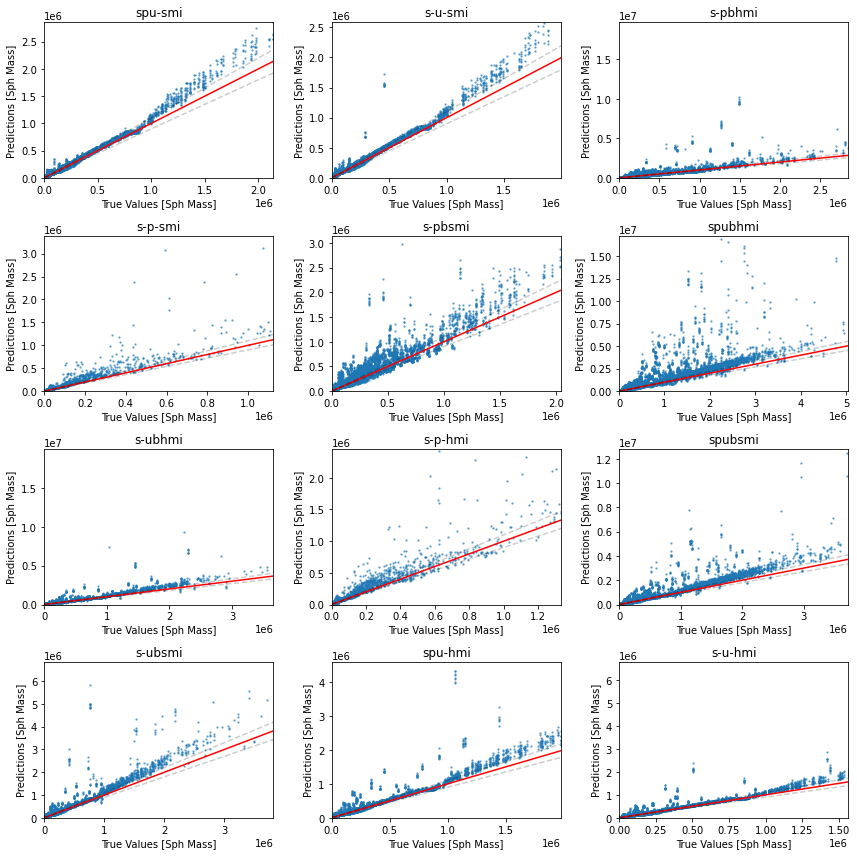

In [35]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo)/2)
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred)/2)
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_zoom.png')

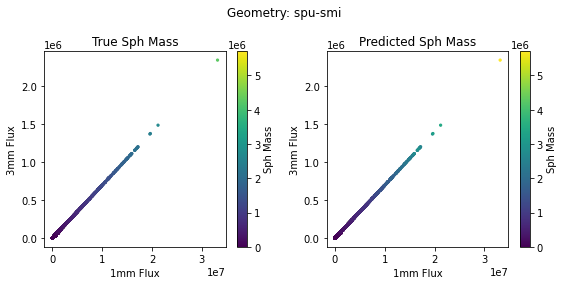

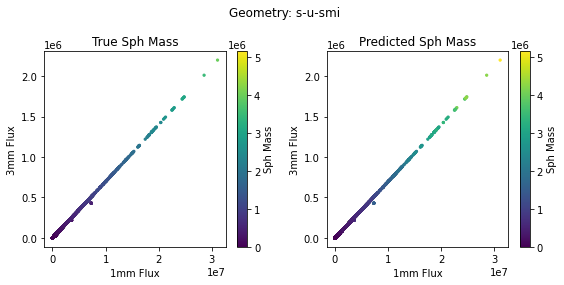

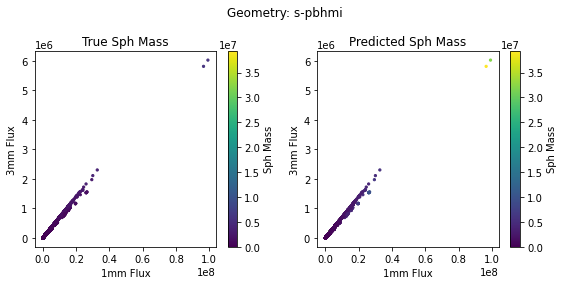

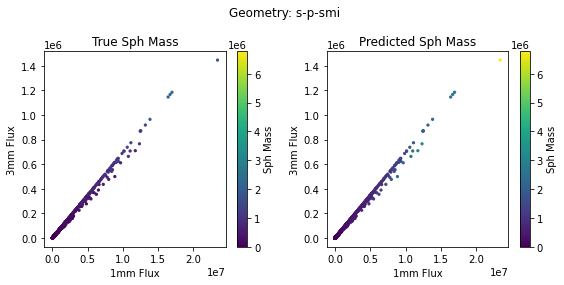

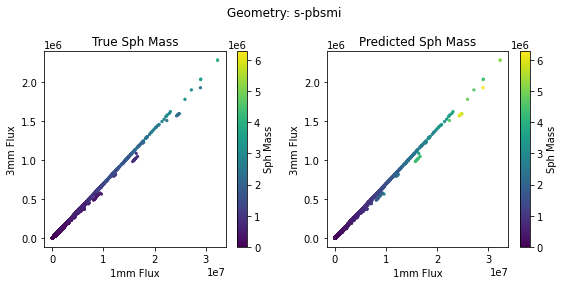

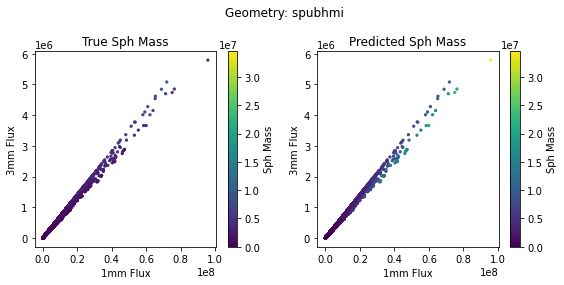

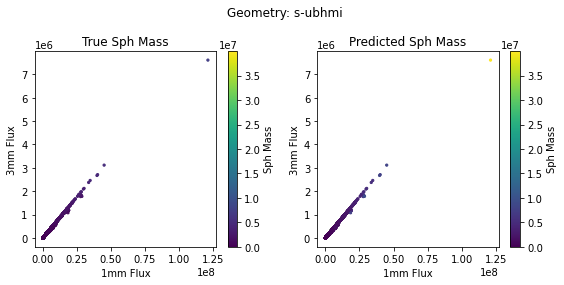

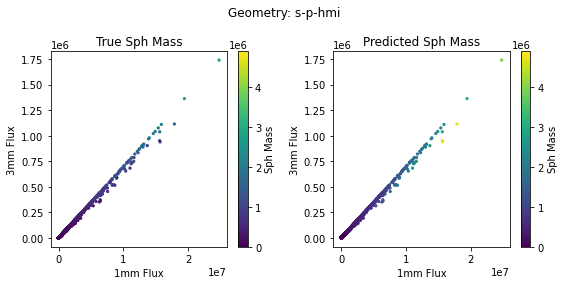

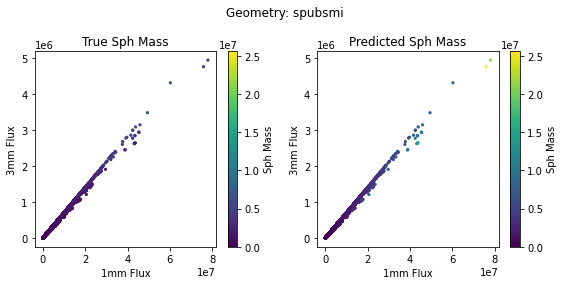

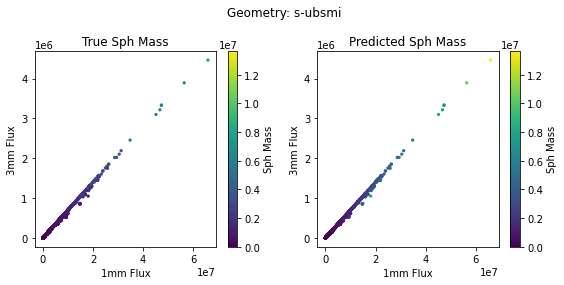

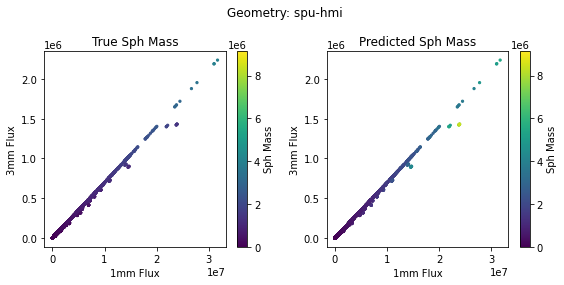

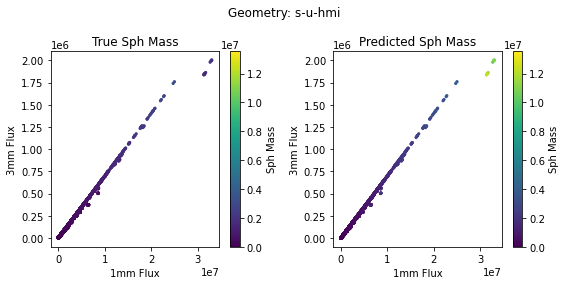

In [36]:
for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)

    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    axs = axes.flatten()

    vmin = np.min(10**pred)
    vmax = np.max(10**pred)
    
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    zl_plot_1 = axs[0].scatter(df_geo['1mm Flux'], df_geo['3mm Flux'], 5, c=df_geo['Sphere Masses'], norm=norm)
    axs[0].set_title('True Sph Mass')
    axs[0].set_xlabel('1mm Flux')
    axs[0].set_ylabel('3mm Flux')
    cbar = plt.colorbar(zl_plot_1, ax=axs[0])
    cbar.set_label('Sph Mass')

    zl_plot_2 = axs[1].scatter(df_geo['1mm Flux'], df_geo['3mm Flux'], 5, c=10**pred, norm=norm)
    axs[1].set_title('Predicted Sph Mass')
    axs[1].set_xlabel('1mm Flux')
    axs[1].set_ylabel('3mm Flux')
    cbar = plt.colorbar(zl_plot_2, ax=axs[1])
    cbar.set_label('Sph Mass')

    fig.suptitle('Geometry: ' + geo)
    fig.tight_layout()
    plt.savefig('./plots/' + geo + '_comparefluxmass.png')
    plt.show()


# Random Forest

### Sphere Mass

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
X = np.array([df['log10 1mm'], df['log10 3mm'], df['Inclination']]).T
X.shape

(1596331, 3)

In [12]:
y = np.array(df['log10 SphM'])
y.shape

(1596331,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
model = RandomForestRegressor(oob_score=True) # Initialize RandomForestRegressor
start_time = time.time()
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 876.061365365982 seconds ---


In [15]:
#start_time = time.time()
#scores = cross_val_score(model, X_train, y_train, cv=5)
#print("--- %s seconds ---" % (time.time() - start_time))

In [16]:
#scores

In [17]:
#np.mean(scores) # Mean of all 5 cross validation scores

In [18]:
model.oob_score_  # Out-of-the-box score

0.8503965904337187

In [19]:
mass_predi_train = model.predict(X_train)
mass_known_train = np.array(y_train)
mass_predi_test = model.predict(X_test) # using the model from above, predict the mass for the test data
mass_known_test = np.array(y_test) # the true mass

In [20]:
linear = np.geomspace(0.01, 2.5*10**7, num=10)
outlier_plus = linear + 0.15*(1+linear)
outlier_minus = linear - 0.15*(1+linear)

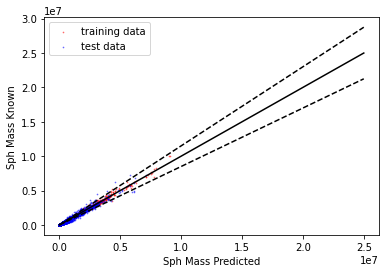

In [21]:
plt.scatter(10**mass_predi_train, 10**mass_known_train, 2, alpha=0.5, marker='.', label='training data', color='red')
plt.scatter(10**mass_predi_test, 10**mass_known_test, 2, alpha=0.5, marker='.', label='test data', color='blue')
plt.plot(linear, linear, color='k')
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
plt.xlabel('Sph Mass Predicted')
plt.ylabel('Sph Mass Known')
plt.legend()
plt.savefig('./plots/randomforest_results.png')

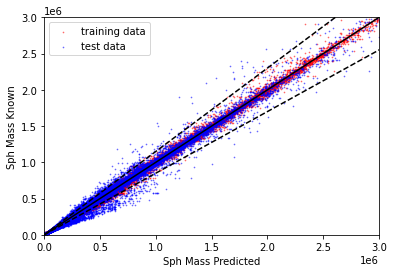

In [22]:
plt.scatter(10**mass_predi_train, 10**mass_known_train, 2, alpha=0.5, marker='.', label='training data', color='red')
plt.scatter(10**mass_predi_test, 10**mass_known_test, 2, alpha=0.5, marker='.', label='test data', color='blue')
plt.plot(linear, linear, color='k')
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
plt.xlabel('Sph Mass Predicted')
plt.ylabel('Sph Mass Known')
plt.legend()
plt.xlim(left=0, right=3e6) #right=np.max(10**y_test))
plt.ylim(bottom=0, top=3e6)
plt.savefig('./plots/randomforest_results_zoom.png')

In [23]:
count = 0

for i in range(len(mass_predi_test)):
    if np.abs(10**mass_predi_test[i] - 10**mass_known_test[i]) > 0.15 * (1 + 10**mass_known_test[i]): # count how many objects $|z_{phot}-z_{spec}| > 0.15/(1+z_{spec})$ is true for
        count += 1

eta = count / len(mass_known_test) # find the fraction of objects its true for
eta

0.22833846593315174

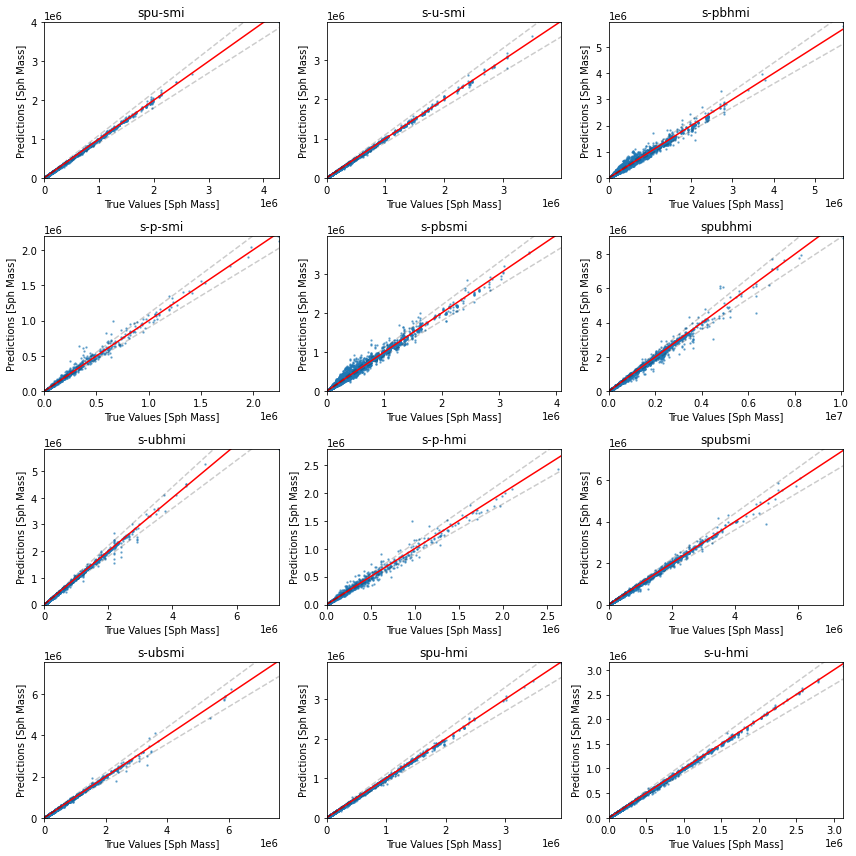

In [24]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo))
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred))
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_randomforest.png')

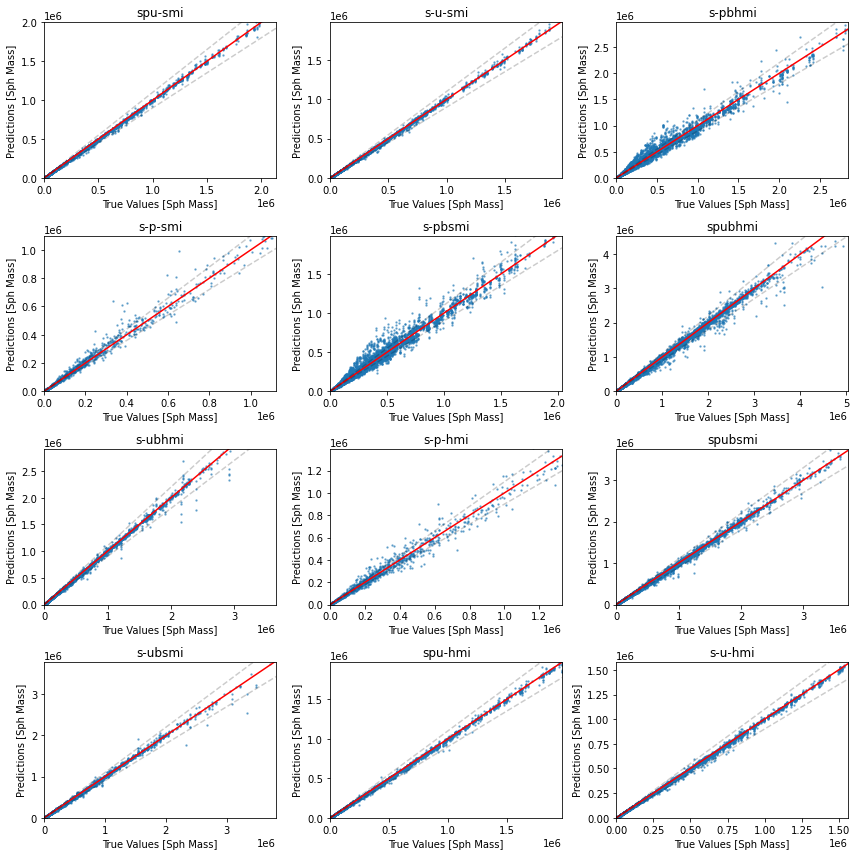

In [25]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo)/2)
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred)/2)
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_zoom_randomforest.png')

### Line-of-Sight Mass

In [10]:
X = np.array([df['log10 1mm'], df['log10 3mm'], df['Inclination']]).T
X.shape

(1596331, 3)

In [11]:
y = np.array(df['log10 LOSM'])
y.shape

(1596331,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
model_los = RandomForestRegressor(oob_score=True) # Initialize RandomForestRegressor
start_time = time.time()
model_los.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 877.0318717956543 seconds ---


In [16]:
model_los.oob_score_

0.869573422546474

In [17]:
mass_predi_train_los = model_los.predict(X_train)
mass_known_train_los = np.array(y_train)
mass_predi_test_los = model_los.predict(X_test) # using the model from above, predict the mass for the test data
mass_known_test_los = np.array(y_test) # the true mass

In [18]:
linear = np.geomspace(0.01, 2.5*10**7, num=10)
outlier_plus = linear + 0.15*(1+linear)
outlier_minus = linear - 0.15*(1+linear)

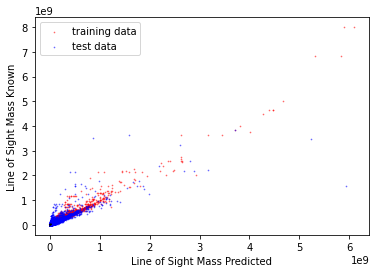

In [19]:
plt.scatter(10**mass_predi_train_los, 10**mass_known_train_los, 2, alpha=0.5, marker='.', label='training data', color='red')
plt.scatter(10**mass_predi_test_los, 10**mass_known_test_los, 2, alpha=0.5, marker='.', label='test data', color='blue')
plt.plot(linear, linear, color='k')
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
plt.xlabel('Line of Sight Mass Predicted')
plt.ylabel('Line of Sight Mass Known')
plt.legend()
plt.savefig('./plots/randomforest_results_los.png')

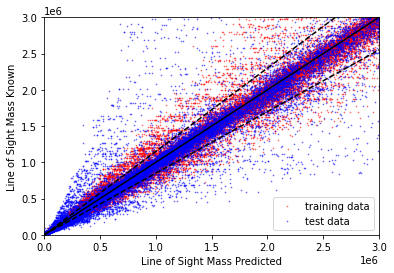

In [20]:
plt.scatter(10**mass_predi_train_los, 10**mass_known_train_los, 2, alpha=0.5, marker='.', label='training data', color='red')
plt.scatter(10**mass_predi_test_los, 10**mass_known_test_los, 2, alpha=0.5, marker='.', label='test data', color='blue')
plt.plot(linear, linear, color='k')
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
plt.xlabel('Line of Sight Mass Predicted')
plt.ylabel('Line of Sight Mass Known')
plt.legend()
plt.xlim(left=0, right=3e6) #right=np.max(10**y_test))
plt.ylim(bottom=0, top=3e6)
plt.savefig('./plots/randomforest_results_zoom_los.png')

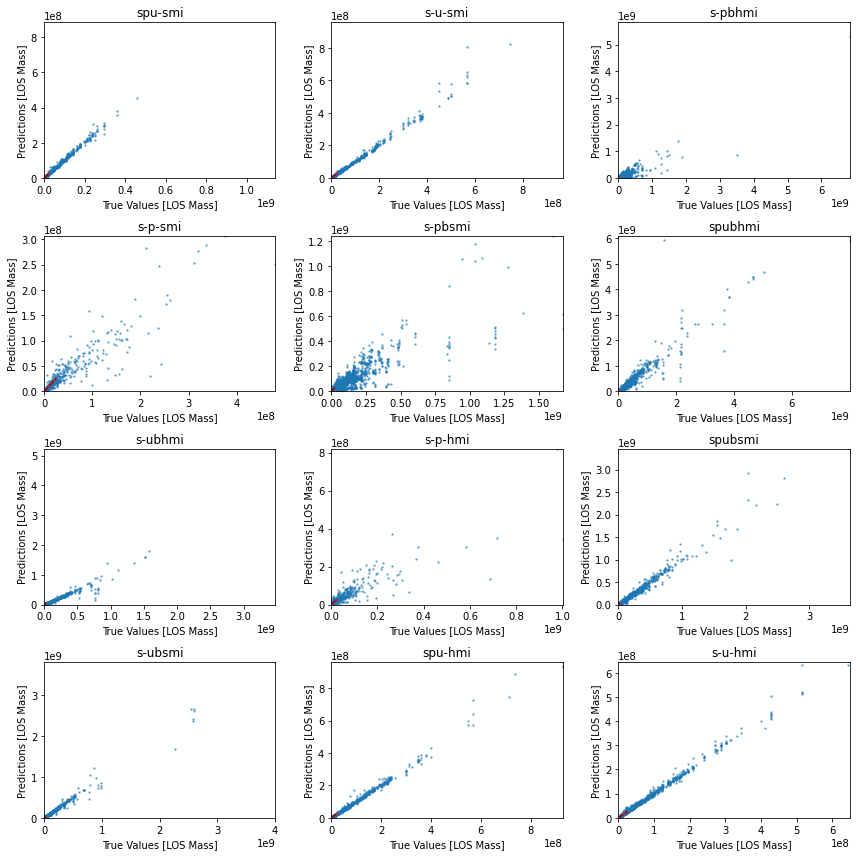

In [21]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 LOSM'])
    pred = model_los.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [LOS Mass]')
    axs[ii].set_ylabel('Predictions [LOS Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo))
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred))
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_randomforest_los.png')

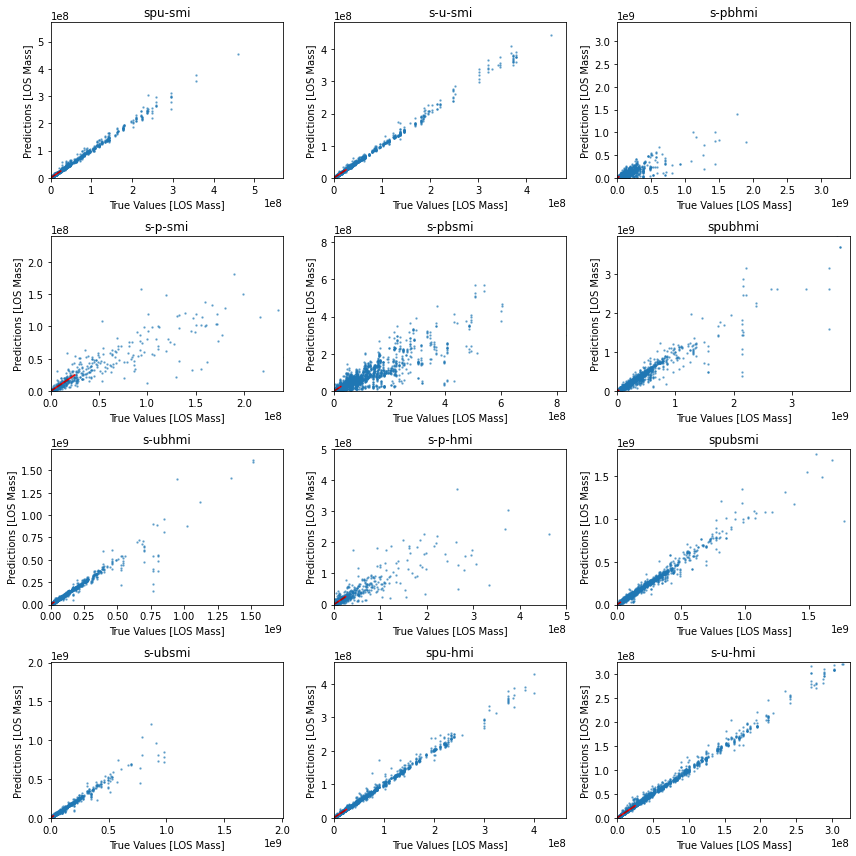

In [22]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm'], df_geo['Inclination']]).T
    y_geo = np.array(df_geo['log10 LOSM'])
    pred = model_los.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [LOS Mass]')
    axs[ii].set_ylabel('Predictions [LOS Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo)/2)
    axs[ii].set_ylim(bottom=0, top=np.max(10**y_geo)/2)
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_zoom_randomforest_los.png')

# Additional Figures

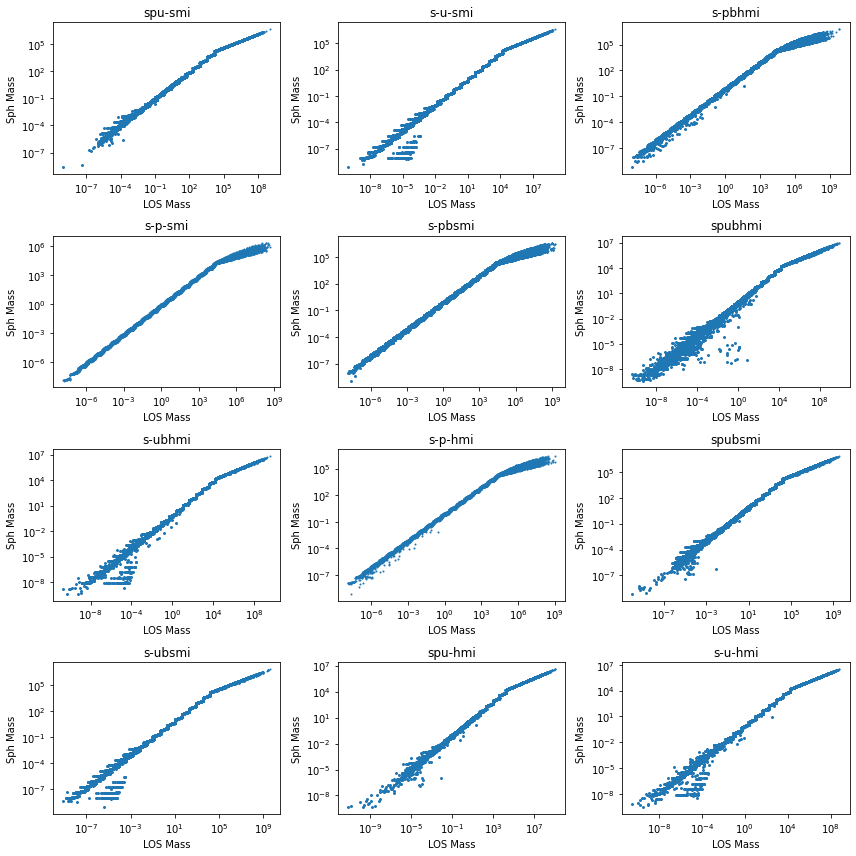

In [25]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('Sph Mass')
    axs[ii].scatter(masses_los, masses_sph, 1)

fig.tight_layout()


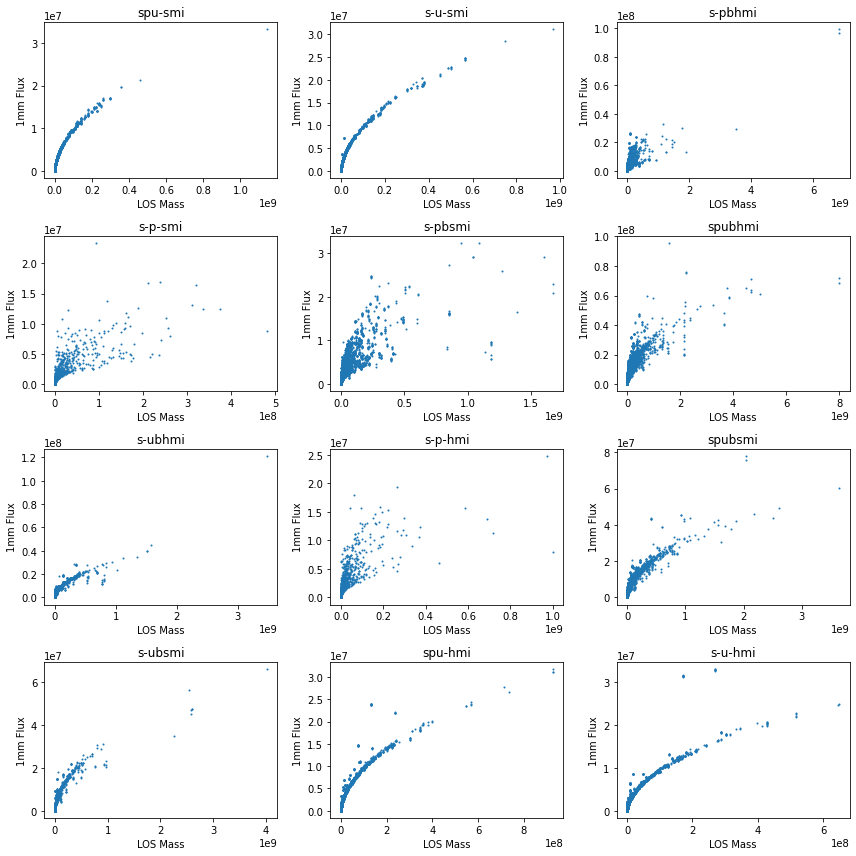

In [27]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('1mm Flux')
    axs[ii].scatter(masses_los, fluxes_1mm, 1)

fig.tight_layout()
plt.savefig('./plots/1mmlos.png')

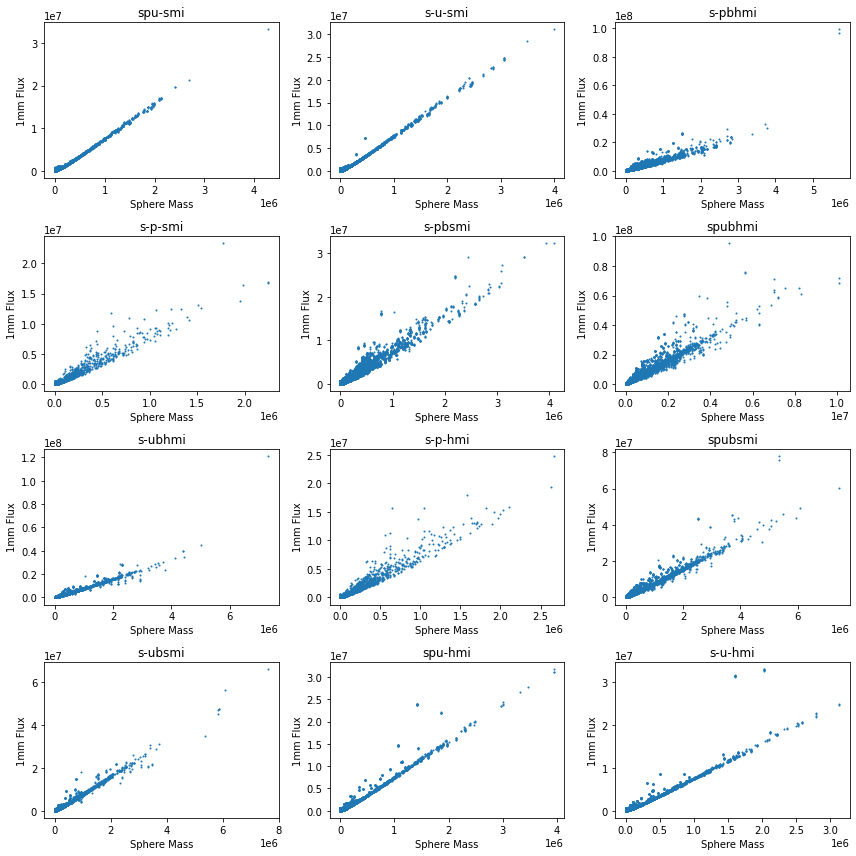

In [12]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('1mm Flux')
    axs[ii].scatter(masses_sph, fluxes_1mm, 1)

fig.tight_layout()
plt.savefig('./plots/1mmsph.png')

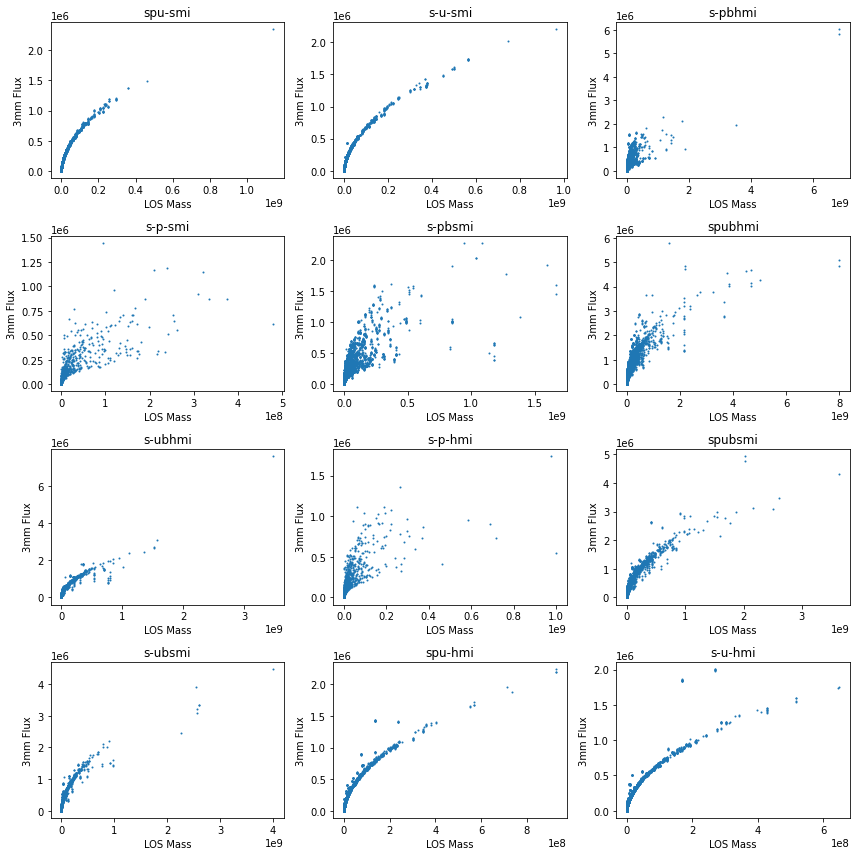

In [13]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('3mm Flux')
    axs[ii].scatter(masses_los, fluxes_3mm, 1)

fig.tight_layout()
plt.savefig('./plots/3mmlos.png')

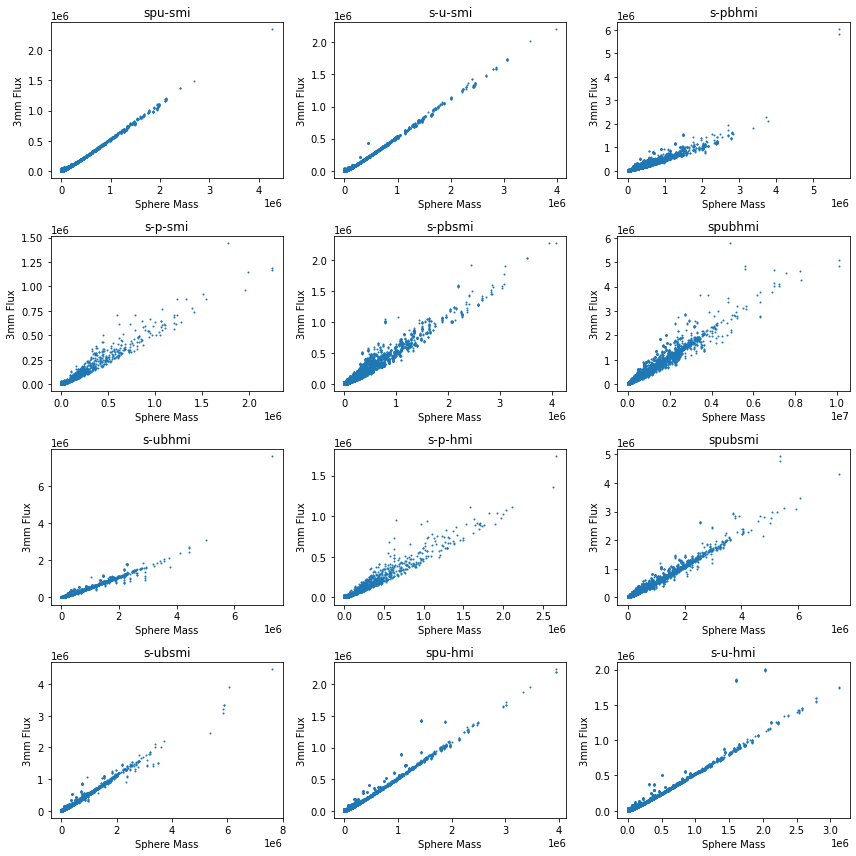

In [14]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('3mm Flux')
    axs[ii].scatter(masses_sph, fluxes_3mm, 1)

fig.tight_layout()
plt.savefig('./plots/3mmsph.png')

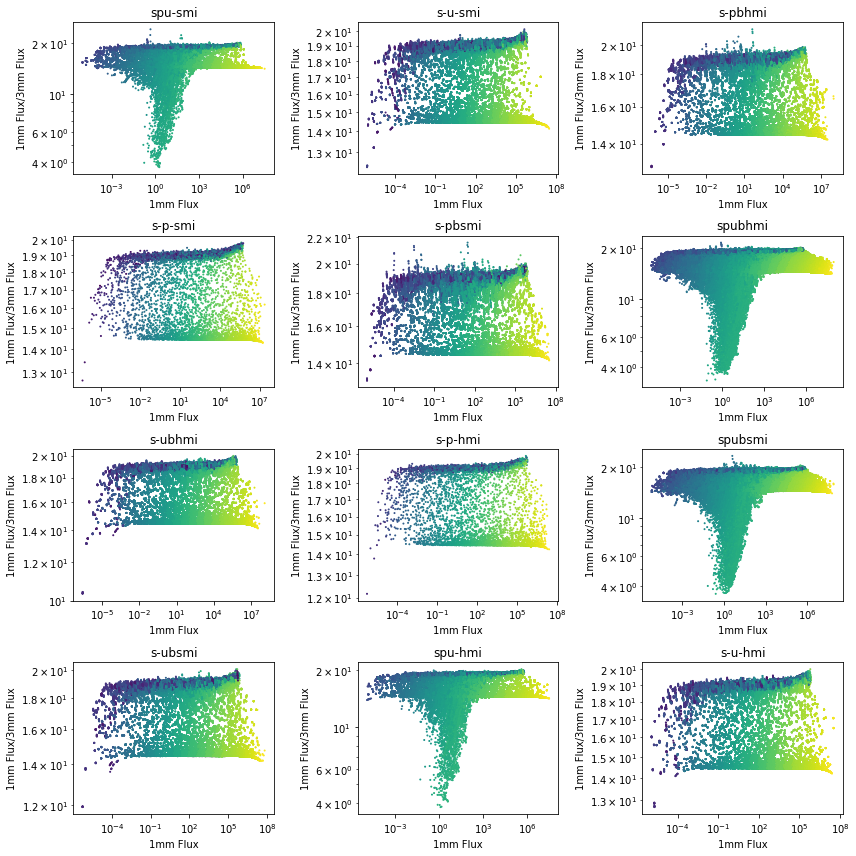

In [22]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('1mm Flux')
    axs[ii].set_ylabel('1mm Flux/3mm Flux')
    norm = colors.LogNorm(vmin=np.min(masses_sph), vmax=np.max(masses_sph))
    axs[ii].scatter(fluxes_1mm, fluxes_1mm/fluxes_3mm, 1, c=masses_sph, norm=norm)
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')

fig.tight_layout()
plt.savefig('./plots/1mm3mm.png')

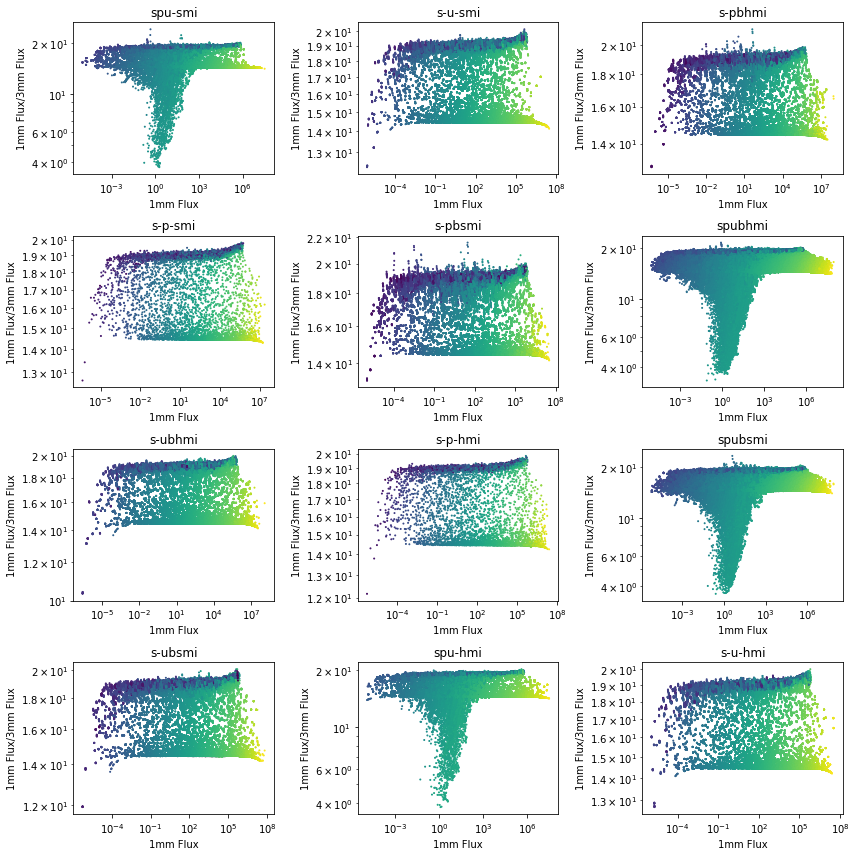

In [23]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('1mm Flux')
    axs[ii].set_ylabel('1mm Flux/3mm Flux')
    norm = colors.LogNorm(vmin=np.min(masses_los), vmax=np.max(masses_los))
    axs[ii].scatter(fluxes_1mm, fluxes_1mm/fluxes_3mm, 1, c=masses_los, norm=norm)
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')

fig.tight_layout()
plt.savefig('./plots/1mm3mm_los.png')

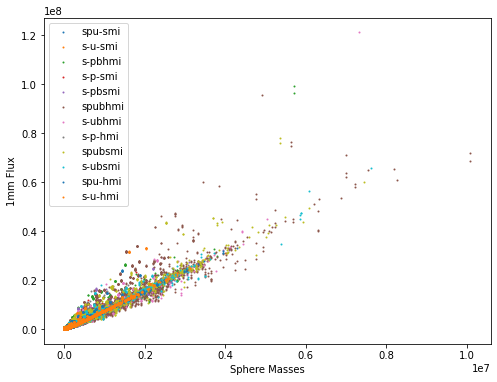

In [16]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    plt.scatter(masses_sph, fluxes_1mm, 1, label=geo)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('1mm Flux')
plt.savefig('./plots/1mmsph_1plot.png')

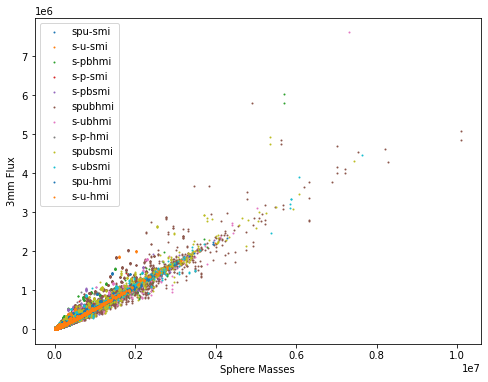

In [17]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    plt.scatter(masses_sph, fluxes_3mm, 1, label=geo)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('3mm Flux')
plt.savefig('./plots/3mmsph_1plot.png')